# Credit Card Default Predictor (DSCI Group Project Proposal)

## Introduction
This project is to come up with a classification predictive model of whether the an account will default on his/her next credit card payment. The dataset is downloaded from [Kaggle](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset).

From the dataset, we see the each observation constitude one client, with basic info such as sex, education, etc. A list of repayment status for each month (PAY_n), bill amount from the same months (BILL_AMTn), and amount of previous payments (PAY_AMTn). Where n corresponds to month before Sept 2005.

## Preliminary Exploratory Data Analysis

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
library(ggplot2)
require(gridExtra)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
data_url <- url("https://raw.githubusercontent.com/mlool/dsci-100-2023W1-group-008-31/main/data/UCI_Credit_Card.csv")
credit_card_data <- read_csv(data_url)
credit_card_data

Rows: 30000 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (25): ID, LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_0, PAY_2, PAY_3,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID    LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4 ⋯
1     1      20000    2   2         1        24   2    2     -1    -1    ⋯
2     2     120000    2   2         2        26  -1    2      0     0    ⋯
3     3      90000    2   2         2        34   0    0      0     0    ⋯
⋮     ⋮     ⋮         ⋮   ⋮         ⋮        ⋮   ⋮     ⋮     ⋮     ⋮     ⋱
29998 29998 30000     1   2         2        37  4      3    2     -1    ⋯
29999 29999 80000     1   3         1        41  1     -1    0      0    ⋯
30000 30000 50000     1   2         1        46  0      0    0      0    ⋯
      BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3 PAY_AMT4
1         0         0         0        0      689        0        0    
2      3272      3455      3261        0     1000     1000     1000    
3     14331     14948     15549     1518     1500     1000     1000    
⋮     ⋮         ⋮         ⋮         ⋮        ⋮        ⋮        ⋮       
29998 20878     20582     19357         0       0     22000    4200    
29999 52774     11855     48944     85900    3409      1178    1926    
30000 36535     32428     15313      2078    1800      1430    1000    
      PAY_AMT5 PAY_AMT6 default.payment.next.month
1        0        0     1                         
2        0     2000     1                         
3     1000     5000     0                         
⋮     ⋮        ⋮        ⋮                         
29998  2000    3100     1                         
29999 52964    1804     1                         
30000  1000    1000     1

**Observations:** We notice that PAY skiped PAY_1 and added a PAY_0, should to keep things consistent, I will rename the column. Furthermore, we observe some columns should be of type category (fct) based on the dataset website, so I will mutate those columns as well. We also filter out all category data that doesn't have a corresponding status.

In [3]:
category_colnames <- c("SEX", "EDUCATION", "MARRIAGE", "default.payment.next.month")
sex_categories <- c(1, 2)
education_categories <- c(1, 2, 3, 4, 5, 6)
marriage_status <- c(1, 2, 3)
pay_status <- c(-1, 1, 2, 3, 4, 5, 6, 7, 8, 9)
credit_card_tidy <- credit_card_data |>
                        rename(PAY_1 = PAY_0) |>
                        mutate(across(category_colnames, ~as_factor(.x))) |>
                        filter(SEX %in% sex_categories,
                               EDUCATION %in% education_categories,
                               MARRIAGE %in% marriage_status,
                               PAY_1 %in% pay_status,
                               PAY_2 %in% pay_status,
                               PAY_3 %in% pay_status,
                               PAY_4 %in% pay_status,
                               PAY_5 %in% pay_status,
                               PAY_6 %in% pay_status,)
credit_card_tidy

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `across(category_colnames, ~as_factor(.x))`.
Caused by warning:
! Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(category_colnames)

  # Now:
  data %>% select(all_of(category_colnames))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.”


ID    LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_1 PAY_2 PAY_3 PAY_4 ⋯
1    12    260000    2   1         2        51  -1    -1    -1    -1    ⋯
2    22    120000    2   2         1        39  -1    -1    -1    -1    ⋯
3    29     50000    2   3         1        47  -1    -1    -1    -1    ⋯
⋮    ⋮     ⋮         ⋮   ⋮         ⋮        ⋮   ⋮     ⋮     ⋮     ⋮     ⋱
4045 29977  40000    1   2         2        47  2     2     3     2     ⋯
4046 29992 210000    1   2         1        34  3     2     2     2     ⋯
4047 29995  80000    1   2         2        34  2     2     2     2     ⋯
     BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3 PAY_AMT4 PAY_AMT5
1    8517      22287     13668     21818    9966     8583     22301      0     
2       0        632       316       316     316        0       632    316     
3    2040      30430       257      3415    3421     2044     30430    257     
⋮    ⋮         ⋮         ⋮         ⋮        ⋮        ⋮        ⋮        ⋮       
4045 51259     47151     46934     4000        0     2000        0     3520    
4046  2500      2500      2500        0        0        0        0        0    
4047 77519     82607     81158     7000     3500        0     7000        0    
     PAY_AMT6 default.payment.next.month
1    3640     0                         
2       0     1                         
3       0     0                         
⋮    ⋮        ⋮                         
4045    0     1                         
4046    0     1                         
4047 4000     1

In [4]:
credit_card_split <- initial_split(credit_card_tidy, prop = 0.75, strata = default.payment.next.month)
credit_card_training <- training(credit_card_split)
credit_card_testing <- testing(credit_card_split)
credit_card_training

ID    LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_1 PAY_2 PAY_3 PAY_4 ⋯
1    12    260000    2   1         2        51  -1    -1    -1    -1    ⋯
2    29     50000    2   3         1        47  -1    -1    -1    -1    ⋯
3    31    230000    2   1         2        27  -1    -1    -1    -1    ⋯
⋮    ⋮     ⋮         ⋮   ⋮         ⋮        ⋮   ⋮     ⋮     ⋮     ⋮     ⋱
3033 29943 130000    1   3         1        45  -1    -1    -1    -1    ⋯
3034 29977  40000    1   2         2        47   2     2     3     2    ⋯
3035 29992 210000    1   2         1        34   3     2     2     2    ⋯
     BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3 PAY_AMT4 PAY_AMT5
1     8517     22287     13668     21818     9966     8583    22301        0   
2     2040     30430       257      3415     3421     2044    30430      257   
3    15339     14307     36923     17270    13281    15339    14307    37292   
⋮    ⋮         ⋮         ⋮         ⋮        ⋮        ⋮        ⋮        ⋮       
3033  2756      1585      1215     1826     2831     2756     1585     1215    
3034 51259     47151     46934     4000        0     2000        0     3520    
3035  2500      2500      2500        0        0        0        0        0    
     PAY_AMT6 default.payment.next.month
1    3640     0                         
2       0     0                         
3       0     0                         
⋮    ⋮        ⋮                         
3033 2402     1                         
3034    0     1                         
3035    0     1

## Data Summarization

In [5]:
# Number of observation in each class
training_count <- credit_card_training |>
                    group_by(default.payment.next.month) |>
                    summarize(count = n())
training_count

default.payment.next.month count
1 0                          1958 
2 1                          1077

I notice there's slightly more none defaults than defaults, leading me to think perhaps we should measure our model based on precision/recall instead of accuracy alone.

In [6]:
training_sex_count <- credit_card_training |>
                        group_by(SEX, default.payment.next.month) |>
                        summarize(count = n()) |>
                        group_by(SEX) |>
                        summarize(percent_of_default = sum(count[default.payment.next.month == 1]) / sum(count)) |>
                        mutate(SEX = case_when(SEX == 1 ~ "male", SEX == 2 ~ "female"))

training_sex_count

`summarise()` has grouped output by 'SEX'. You can override using the `.groups`
argument.


SEX    percent_of_default
1 male   0.3900482         
2 female 0.3303522

I notice that male tends to have a slightly higher chance to default, but difference is small, so unlikely to use this column, as it would introduce gender discrimination in our model, which we want to avoid.

In [7]:
training_marriage_count <- credit_card_training |>
                            group_by(MARRIAGE, default.payment.next.month) |>
                            summarize(count = n()) |>
                            group_by(MARRIAGE) |>
                            summarize(percent_of_default = sum(count[default.payment.next.month == 1]) / sum(count)) |>
                            mutate(MARRIAGE = case_when(MARRIAGE == 1 ~ "married", 
                                                        MARRIAGE == 2 ~ "single",
                                                        MARRIAGE == 3 ~ "other"
                                                       ))

training_marriage_count

`summarise()` has grouped output by 'MARRIAGE'. You can override using the
`.groups` argument.


MARRIAGE percent_of_default
1 married  0.3432642         
2 single   0.3649386         
3 other    0.4800000

I notice that single and other have a slightly higher chance to default, however the difference is small, so might not be an important factor

In [8]:
training_education_count <- credit_card_training |>
                            group_by(EDUCATION, default.payment.next.month) |>
                            summarize(count = n()) |>
                            group_by(EDUCATION) |>
                            summarize(percent_of_default = sum(count[default.payment.next.month == 1]) / sum(count)) |>
                            mutate(EDUCATION = case_when(EDUCATION == 1 ~ "grad", 
                                                        EDUCATION == 2 ~ "university",
                                                        EDUCATION == 3 ~ "high school",
                                                        EDUCATION == 4 ~ "others",
                                                        EDUCATION == 5 ~ "unknown",
                                                        EDUCATION == 6 ~ "unknown",
                                                       ))

print(training_education_count)

`summarise()` has grouped output by 'EDUCATION'. You can override using the
`.groups` argument.


# A tibble: 6 × 2
  EDUCATION   percent_of_default
  <chr>                    <dbl>
1 grad                     0.287
2 university               0.421
3 high school              0.371
4 others                   0    
5 unknown                  0    
6 unknown                  0    


I notice that grad has a lower chance to default than university and high school, although difference is small between university and highschool, grad is quite a big difference, so might be an important factor

## Data Visualization

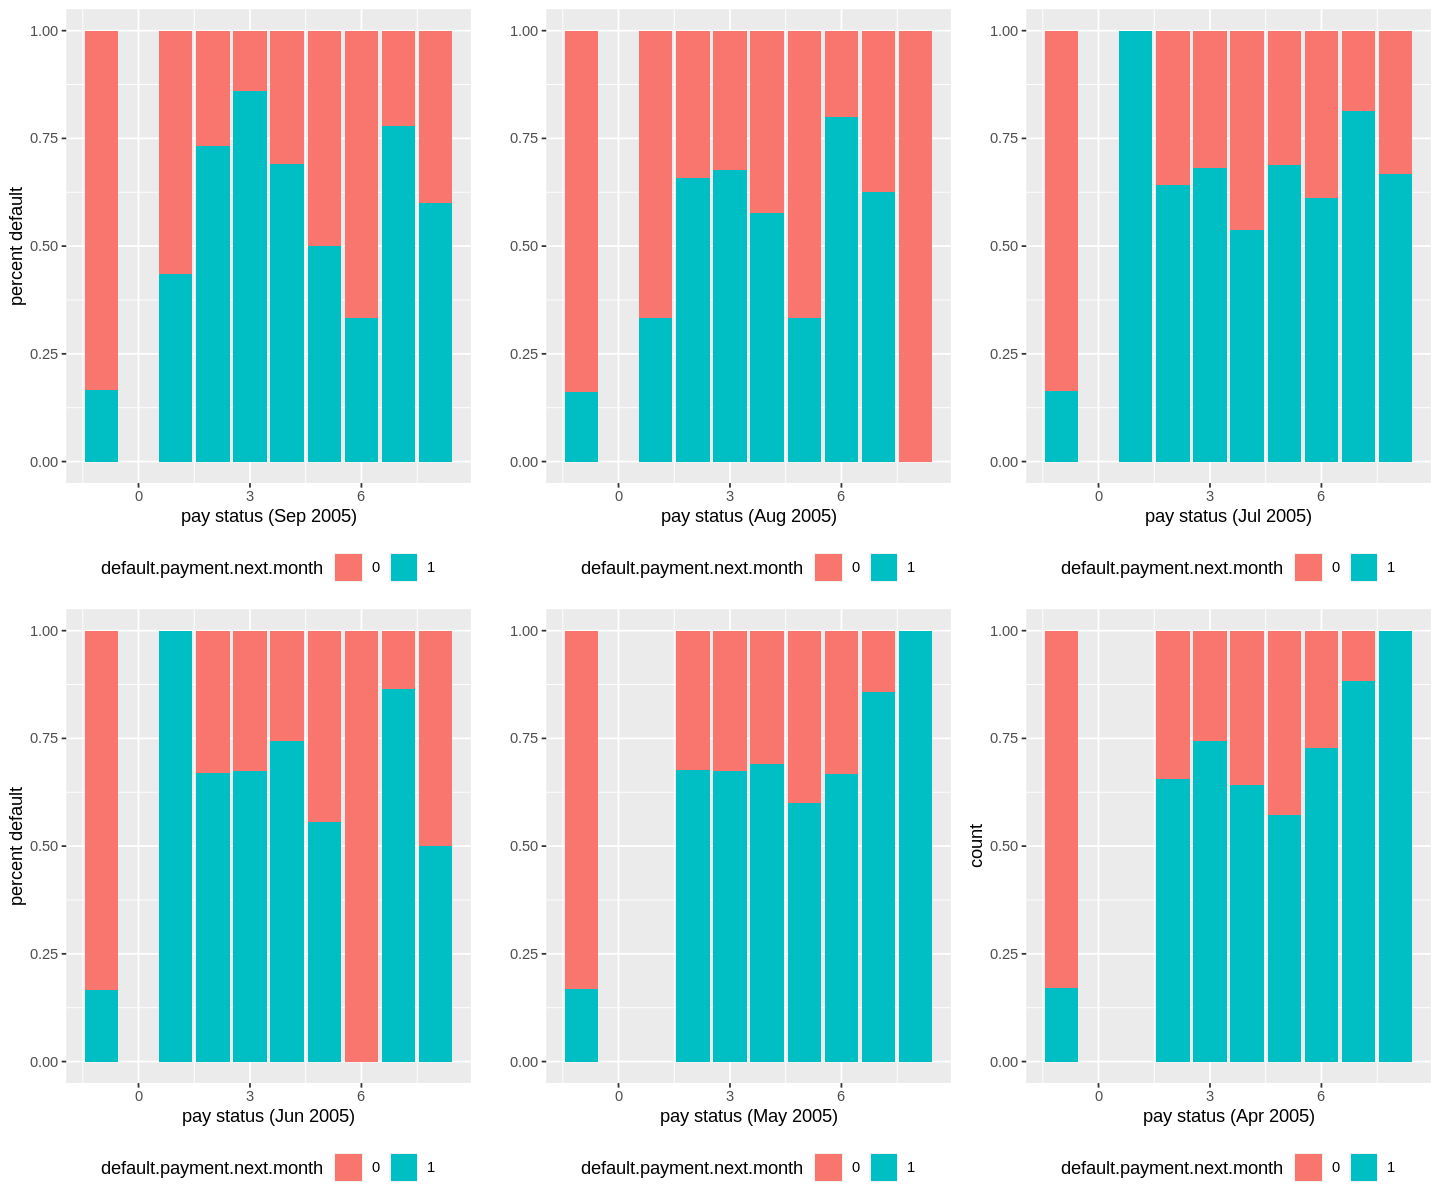

In [9]:
options(repr.plot.width = 12, repr.plot.height = 10)

pay_1_plot <- credit_card_training |> 
                ggplot(aes(x = PAY_1, fill = default.payment.next.month)) +
                geom_bar(stat = "count", position = "fill") +
                labs(x = "pay status (Sep 2005)", y = "percent default") + 
                theme(legend.position="bottom")

pay_2_plot <- credit_card_training |> 
                ggplot(aes(x = PAY_2, fill = default.payment.next.month)) +
                geom_bar(stat = "count", position = "fill") +
                labs(x = "pay status (Aug 2005)", y = "") + 
                theme(legend.position="bottom")

pay_3_plot <- credit_card_training |> 
                ggplot(aes(x = PAY_3, fill = default.payment.next.month)) +
                geom_bar(stat = "count", position = "fill") +
                labs(x = "pay status (Jul 2005)", y = "") + 
                theme(legend.position="bottom")

pay_4_plot <- credit_card_training |> 
                ggplot(aes(x = PAY_4, fill = default.payment.next.month)) +
                geom_bar(stat = "count", position = "fill") +
                labs(x = "pay status (Jun 2005)", y = "percent default") + 
                theme(legend.position="bottom")

pay_5_plot <- credit_card_training |> 
                ggplot(aes(x = PAY_5, fill = default.payment.next.month)) +
                geom_bar(stat = "count", position = "fill") +
                labs(x = "pay status (May 2005)", y = "") + 
                theme(legend.position="bottom")

pay_6_plot <- credit_card_training |> 
                ggplot(aes(x = PAY_6, fill = default.payment.next.month)) +
                geom_bar(stat = "count", position = "fill") +
                labs(x = "pay status (Apr 2005)") +
                theme(legend.position="bottom")

grid.arrange(pay_1_plot, pay_2_plot, pay_3_plot, pay_4_plot, pay_5_plot, pay_6_plot, nrow = 2, ncol = 3)

We see those who do not pay duly tend to default more than those who does, the difference is much quite significant so this might be an important factor in our model.

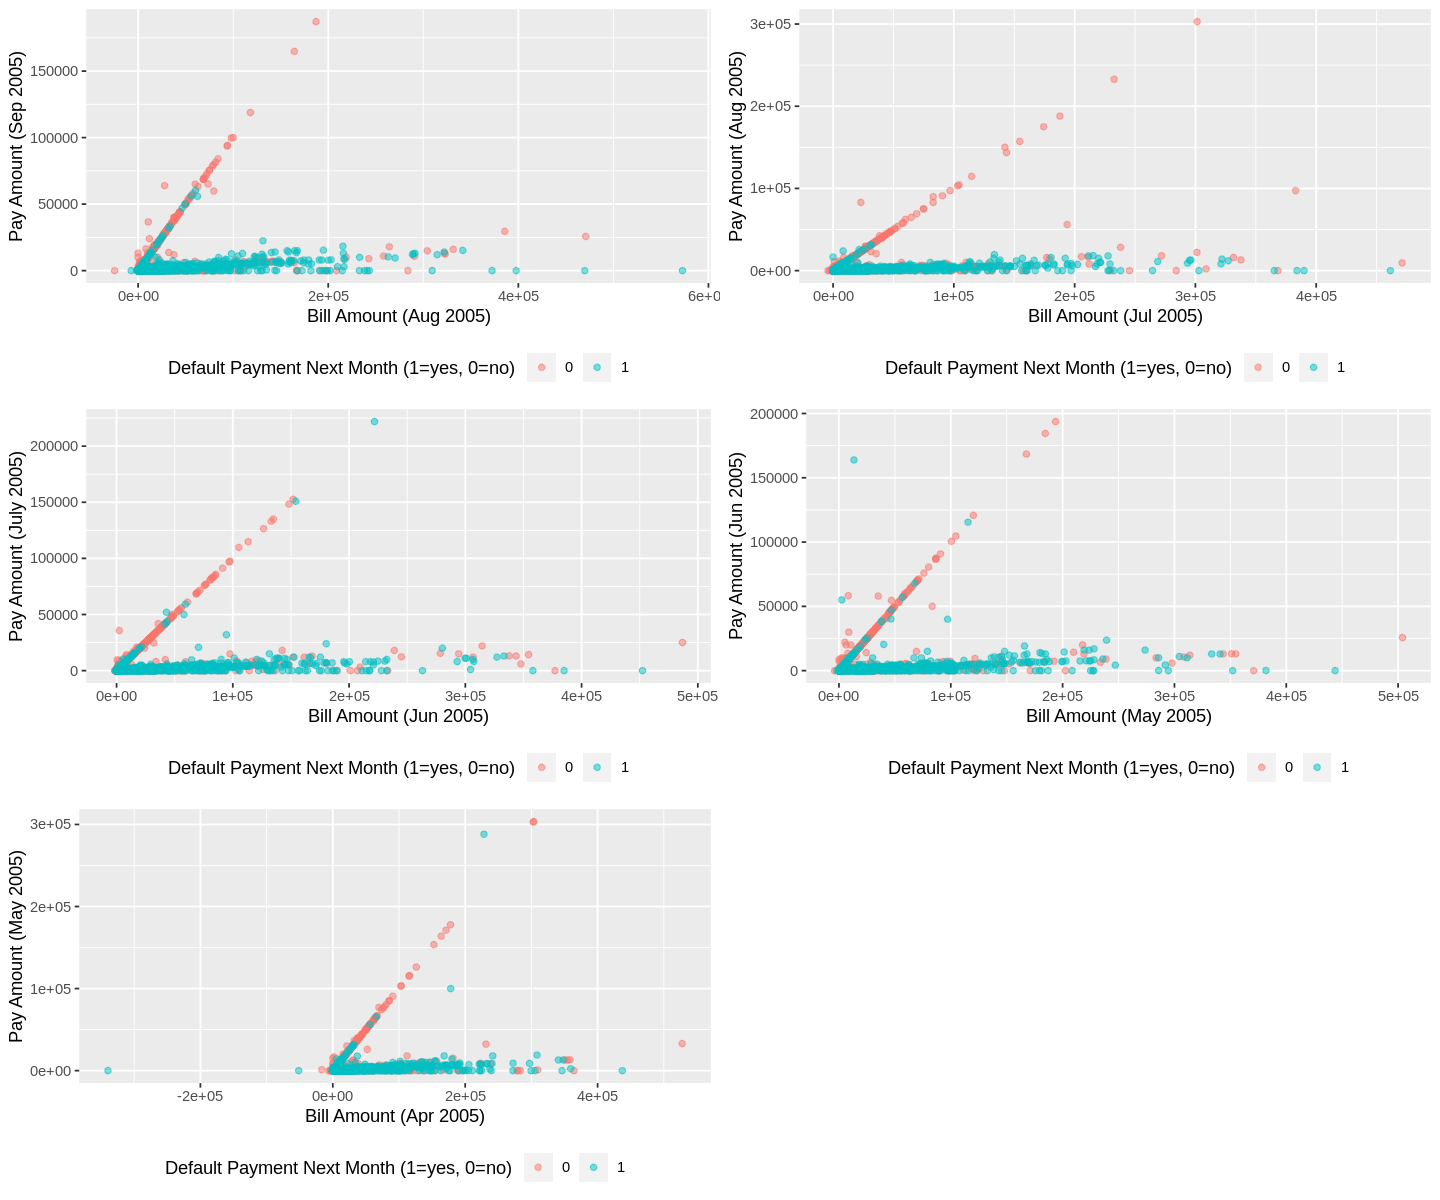

In [10]:
# Offset the x and y since you pay for the previous month
plot_1 <- ggplot(credit_card_training, aes(x = BILL_AMT2, y = PAY_AMT1, color = default.payment.next.month )) +
            geom_point(alpha=0.5) +
            labs(x = "Bill Amount (Aug 2005)",
                 y = "Pay Amount (Sep 2005)",
                 color="Default Payment Next Month (1=yes, 0=no)") + 
            theme(legend.position="bottom")

plot_2 <- ggplot(credit_card_training, aes(x = BILL_AMT3, y = PAY_AMT2, color = default.payment.next.month )) +
            geom_point(alpha=0.5) +
            labs(x = "Bill Amount (Jul 2005)",
                 y = "Pay Amount (Aug 2005)",
                 color="Default Payment Next Month (1=yes, 0=no)") + 
            theme(legend.position="bottom")

plot_3 <- ggplot(credit_card_training, aes(x = BILL_AMT4, y = PAY_AMT3, color = default.payment.next.month )) +
            geom_point(alpha=0.5) +
            labs(x = "Bill Amount (Jun 2005)",
                 y = "Pay Amount (July 2005)",
                 color="Default Payment Next Month (1=yes, 0=no)") + 
            theme(legend.position="bottom")

plot_4 <- ggplot(credit_card_training, aes(x = BILL_AMT5, y = PAY_AMT4, color = default.payment.next.month )) +
            geom_point(alpha=0.5) +
            labs(x = "Bill Amount (May 2005)",
                 y = "Pay Amount (Jun 2005)",
                 color="Default Payment Next Month (1=yes, 0=no)") + 
            theme(legend.position="bottom")

plot_5 <- ggplot(credit_card_training, aes(x = BILL_AMT6, y = PAY_AMT5, color = default.payment.next.month )) +
            geom_point(alpha=0.5) +
            labs(x = "Bill Amount (Apr 2005)",
                 y = "Pay Amount (May 2005)",
                 color="Default Payment Next Month (1=yes, 0=no)") + 
            theme(legend.position="bottom")

grid.arrange(plot_1, plot_2, plot_3, plot_4, plot_5, nrow = 3, ncol = 2)

I notice that those who pay the full amount of the previous bill tends not to default (straight line) but those who don't pay tends to default (low pay amount). This would also be an important predictor in our model, however, we might need to mutate the data a bit to create something like "percent of payment" for the model to better understand that the two columns are closely related.

## Summary
Although there is quite a bit of cleaning needed, the preliminary data analysis leads to promising results. Through data summaries, I believe education may be an important factor while sex and marriage not as much. And in terms of numerical data, we find whether or not a person defaults this month is a predictor for next month. Further, the relationship between pay amount and bill is also important in predicting next month's pay status. This model is important since we will be able to predict possible defaults, which is a factor in considering lending loans for the bank. However, from the data analysis, there are some questions regarding how best to measure the success of the model as well as how to combine the columns for a better indicator.